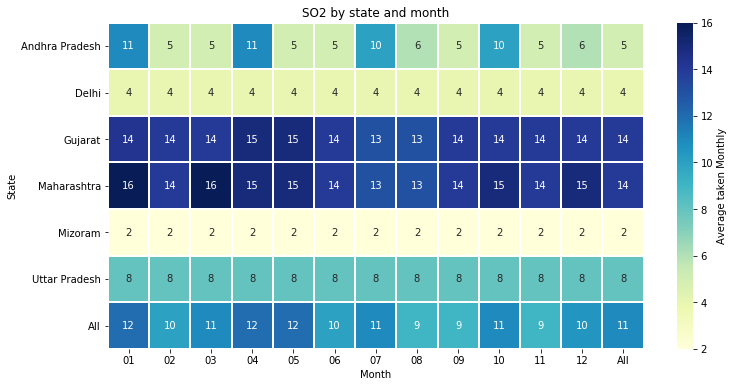

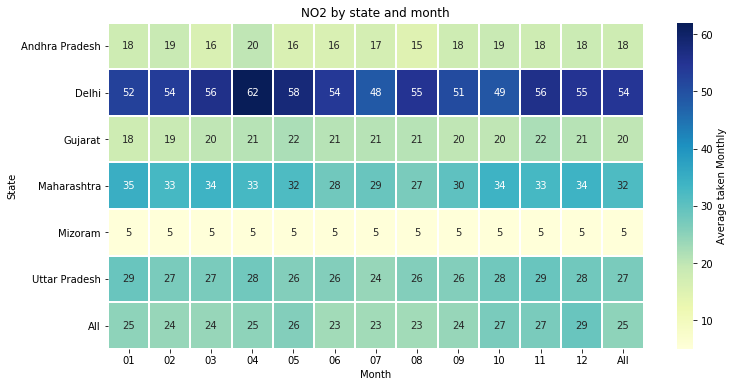

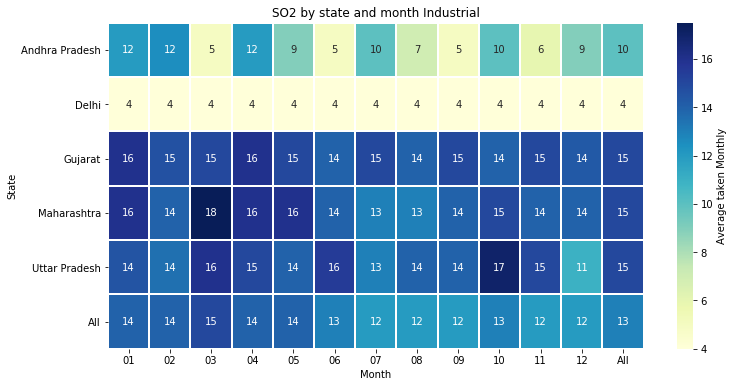

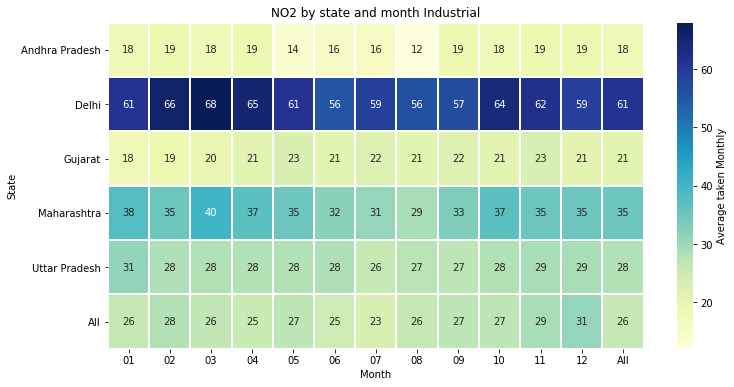

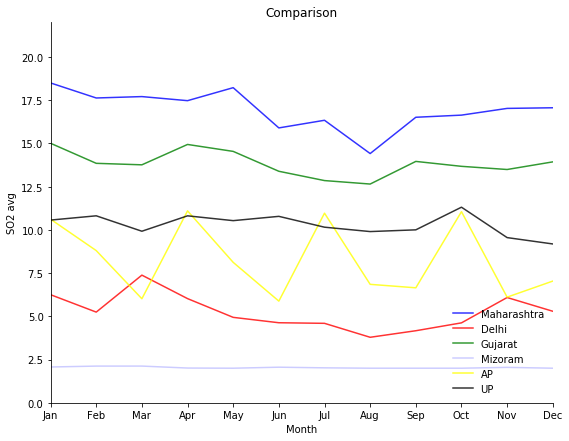

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dfm=pd.read_csv('4/MH.csv')
dfg=pd.read_csv('4/GUJ.csv')
dfd=pd.read_csv('4/DLI.csv')
dfmi=pd.read_csv('4/MZ.csv',encoding='cp1252')
dfup=pd.read_csv('4/UP.csv')
dfap=pd.read_csv('4/AP.csv')

#dfg 1321 dfmi 1140 dfm 6425 dfd 728 dfup3960 dfap 2326
frame=[dfg,dfmi,dfm,dfd,dfup,dfap]
df=pd.concat(frame)
#df.info()
df=df.reset_index()

#df.info()# so2,no2,rspm have null values drop it; pm 2.5 have no values

#rep = {'state': {r'which i want to replace': 'the replaced term', }}

#df.replace(rep, regex = True, inplace = True)

#df['Type of Location'].value_counts()

df['Type']=df['Type of Location']
df['City']=df['City/Town/Village/Area']
#dropping null rows
df = df.dropna(axis = 0, subset = ['SO2'])
df = df.dropna(axis = 0, subset = ['NO2'])
df = df.dropna(axis = 0, subset = ['RSPM/PM10'])
#now delete columns

del df['Agency']
del df['Type of Location']
del df['PM 2.5']
del df['Stn Code']
del df['City/Town/Village/Area']
del df['Location of Monitoring Station']
# you can either delete the columns this way or use columns_to_keep or can use df.drop([''],axis=1,#if i use inplace=True here then i dont need to store the df into another dataframe but it will overwrite df)
#Then,
#columns_to_keep=['','']
#df=df[columns_to_keep]
#df

#df=df.set_index(['State','City'])

# a friend has said that you can't change the dataframe; so i am changing a column into list and editing it and then adding it into DF
new = list(df['Type'])
for i in range(0, len(df)):
    if (str(new[i][0]) == 'R' and str(new[i][1]) == 'e'):
        new[i] = 'RES'
    elif str(new[i][0]) == 'I':
        new[i] = 'IND'
    else:
        new[i] = 'OTH'#sensitive area
    
df['Type'] = new
df['Type'].value_counts()

#analyze the data monthly
date = list(df['Sampling Date'])
for i in range(0, len(df)):
    date[i]=date[i][3:5]
    if date[i]=='6/':
        date[i]='06'
df['Month'] = date
df['Month'].value_counts()

#df.loc[df['Month'] == '6/']

#SO2 ANALUSIS heatmap ;seaborn

f, ax = plt.subplots(figsize = (12,6))
ax.set_title('{} by state and month'.format('SO2'))
sns.heatmap(df.pivot_table('SO2', index = 'State',
                columns = ['Month'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Monthly'})

#NO2 ANALUSIS heatmap ;seaborn

f, ax = plt.subplots(figsize = (12,6))
ax.set_title('{} by state and month'.format('NO2'))
sns.heatmap(df.pivot_table('NO2', index = 'State',
                columns = ['Month'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Monthly'})

dfIND=df.loc[df['Type'] == 'IND']
dfIND=dfIND.reset_index()

dfRES=df.loc[df['Type'] == 'RES']
dfRES=dfRES.reset_index()
#SO2 ANALUSIS heatmap ;seaborn

f, ax = plt.subplots(figsize = (12,6))
ax.set_title('{} by state and month Industrial'.format('SO2'))
sns.heatmap(dfIND.pivot_table('SO2', index = 'State',
                columns = ['Month'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Monthly'})

#NO2 ANALUSIS heatmap ;seaborn

f, ax = plt.subplots(figsize = (12,6))
ax.set_title('{} by state and month Industrial'.format('NO2'))
sns.heatmap(dfIND.pivot_table('NO2', index = 'State',
                columns = ['Month'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Monthly'})


#dfRES['Date-Month'],dfRES['Year']=zip(*dfRES['Sampling Date'].apply(lambda x: (x[:5],x[6:])))

#date = list(dfRES['Date-Month'])
#for i in range(0, len(dfRES)):
#    date[i]=date[i][3:]+'-'+date[i][0:2]
#    if date[i][0:2]=='6/':
#        date[i]= '06'+'-'+date[i][3:]
#dfRES['Month-Date'] = date
#dfRES['Month-Date'].value_counts()
#
#so2_avg_guj = dfRES[(dfRES['State'] == 'Gujarat')].groupby('Month-Date').aggregate({'SO2':np.mean})
#so2_avg_dli = dfRES[(dfRES['State'] == 'Delhi')].groupby('Month-Date').aggregate({'SO2':np.mean})
#so2_avg_mh = dfRES[(dfRES['State'] == 'Maharashtra')].groupby('Month-Date').aggregate({'SO2':np.mean})
#so2_avg_up = dfRES[(dfRES['State'] == 'Uttar Pradesh')].groupby('Month-Date').aggregate({'SO2':np.mean})
#so2_avg_ap = dfRES[(dfRES['State'] == 'Andhra Pradesh')].groupby('Month-Date').aggregate({'SO2':np.mean})

so2_avg_guj = dfRES[(dfRES['State'] == 'Gujarat')].groupby('Month').aggregate({'SO2':np.mean})
so2_avg_dli = dfRES[(dfRES['State'] == 'Delhi')].groupby('Month').aggregate({'SO2':np.mean})
so2_avg_mh = dfRES[(dfRES['State'] == 'Maharashtra')].groupby('Month').aggregate({'SO2':np.mean})
so2_avg_up = dfRES[(dfRES['State'] == 'Uttar Pradesh')].groupby('Month').aggregate({'SO2':np.mean})
so2_avg_ap = dfRES[(dfRES['State'] == 'Andhra Pradesh')].groupby('Month').aggregate({'SO2':np.mean})
so2_avg_miz = dfRES[(dfRES['State'] == 'Mizoram')].groupby('Month').aggregate({'SO2':np.mean})


plt.figure(figsize=(9,7))
plt.plot(so2_avg_mh.values,'-k',alpha=0.8,c='blue',label='Maharashtra')
plt.plot(so2_avg_dli.values,'-k',alpha=0.8,c='r',label='Delhi')
plt.plot(so2_avg_guj.values,'-k',alpha=0.8,c='g',label='Gujarat')
plt.plot(so2_avg_miz.values,'-k',alpha=0.2,c='blue',label='Mizoram')
plt.plot(so2_avg_ap.values,'-k',alpha=0.8,c='yellow',label='AP')
plt.plot(so2_avg_up.values,'-k',alpha=0.8,c='black',label='UP')
plt.gca().axis([0, 11, 0, 22])
plt.xticks(np.arange(12), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) 
plt.legend(frameon=False, loc=4)
plt.xlabel('Month')
plt.ylabel('SO2 avg')
plt.title('Comparison')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
